In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import kendalltau
import seaborn as sb
from sklearn.model_selection import train_test_split
from pylab import rcParams

In [2]:
#used the petal columns since flowers are more distinguishable by its petals than its sepals
iris = pd.read_csv('iris.csv')

In [3]:
# Not removing any column since leaving only two columns overly simplifies the dataset columns

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris['species'] = iris['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = iris.drop("species", axis=1)
y = iris["species"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [11]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [12]:
y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species, Length: 105, dtype: int64

In [13]:
X_train.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# Mutual Information

In [16]:
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.59184678, 0.19122896, 0.98252454, 0.98868718])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

petal_width     0.988687
petal_length    0.982525
sepal_length    0.591847
sepal_width     0.191229
dtype: float64

In [18]:
# Pearson

In [19]:
import seaborn as sns

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(X_train, 0.01)
len(set(corr_features))

3

In [22]:
corr_features

{'petal_length', 'petal_width', 'sepal_width'}

In [23]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,sepal_length
114,5.8
62,6.0
33,5.5
107,7.3
7,5.0
100,6.3
40,5.0
86,6.7
76,6.8
71,6.1


In [24]:
#kendall

In [25]:
corr = iris.corr(method='kendall')

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

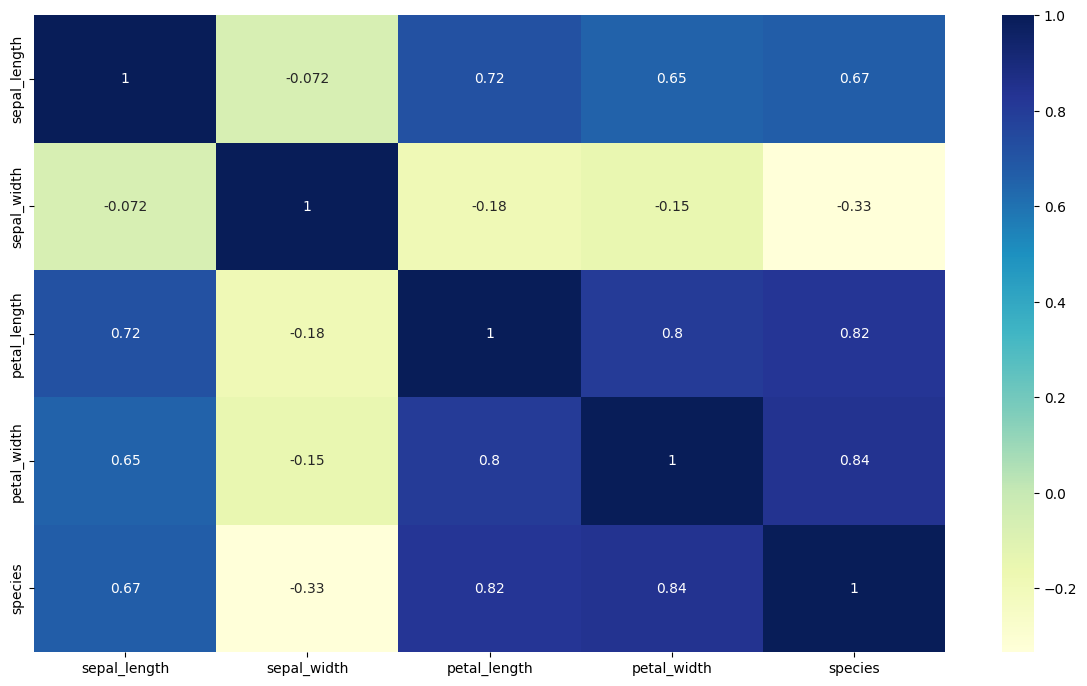

In [32]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)